In [93]:
import numpy as np

In [94]:
import sep

In [95]:
import astropy.io.fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]


In [96]:
#Changes fitsio to astropy as requiredment
from astropy.io import fits
#Run the fits file
fitsfile = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
#Open fits file
with fits.open(fitsfile) as hdul:
    #Display file structure
    hdul.info()
    #Access the primary data on the first HDU
    hduldata = hdul[0].data

Filename: hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


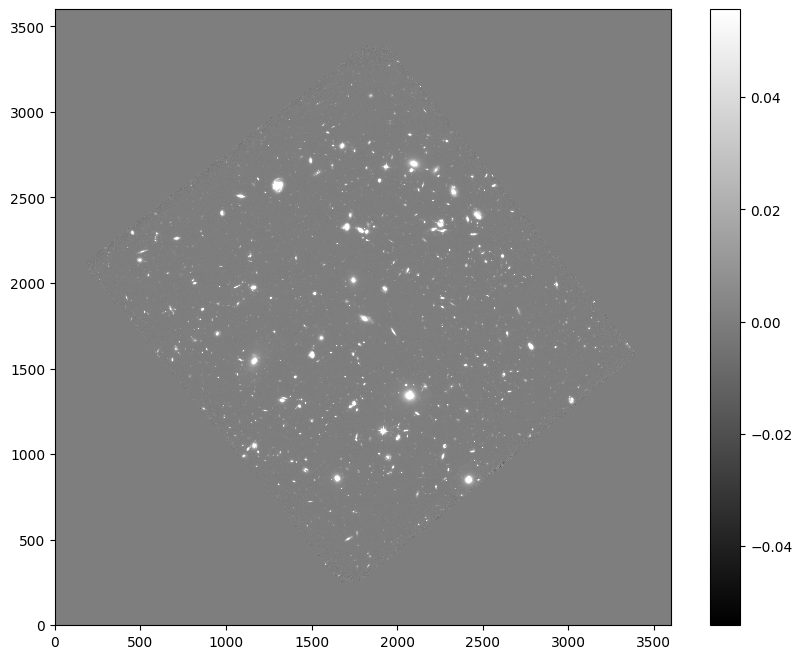

In [97]:
#Pirnt the image
m, s = np.mean(hduldata), np.std(hduldata)
plt.imshow(hduldata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('Hubble_Ultra_Deep_Field.pdf')

In [98]:
#Measure a spatially varying background on the image
#What works on Finals/Tutorial doesnt work
#changes data to data = 
bkg = sep.Background(data = hduldata.byteswap().newbyteorder())

In [99]:
#Get global mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [100]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

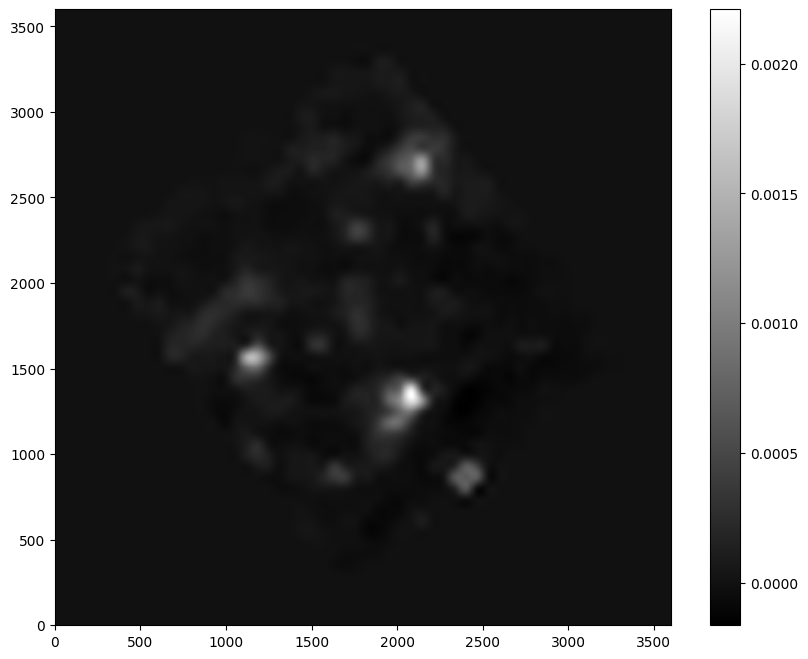

In [101]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Hubble_Ultra_Deep_Field_Background.pdf')

In [102]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()


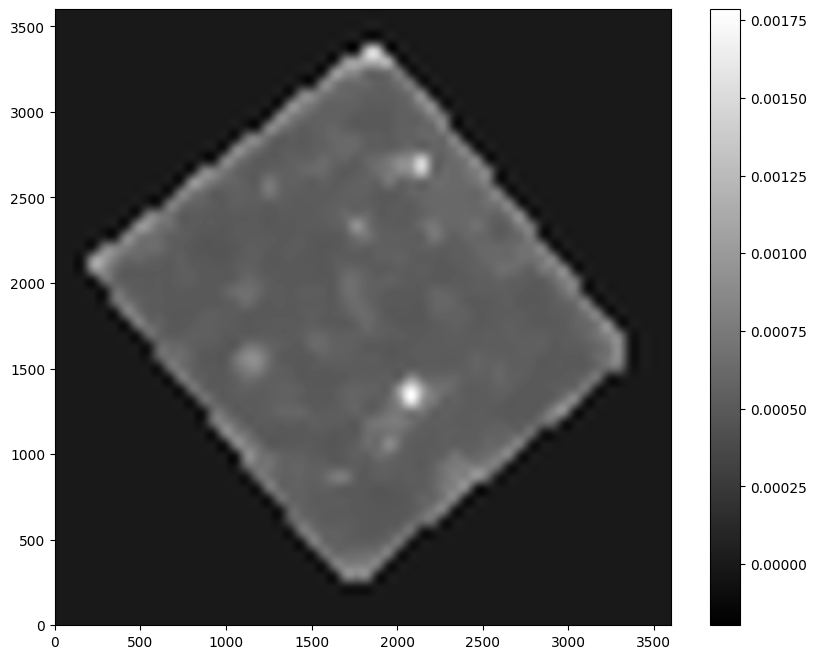

In [103]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Hubble_Ultra_Deep_Field_Background_Noise.pdf')

In [104]:
# subtract the background
datasub = hduldata - bkg

In [105]:
objects = sep.extract(datasub, 1.5, err=bkg.globalrms)

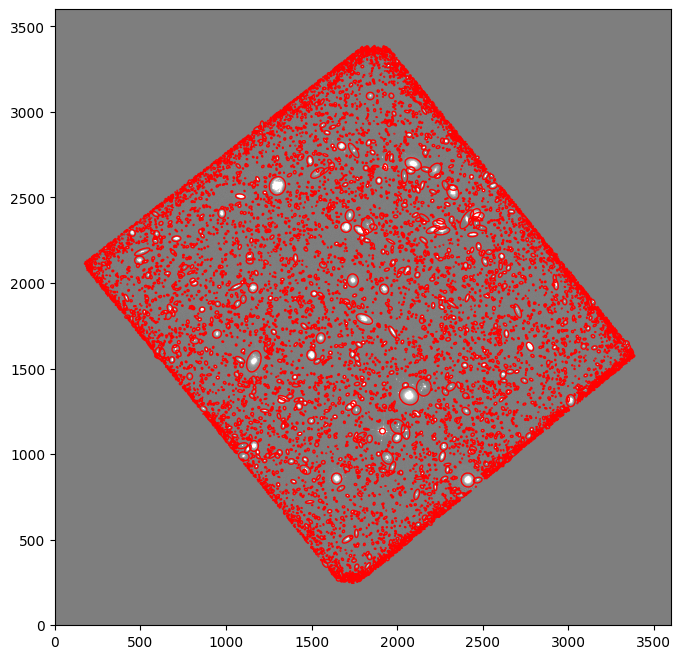

In [106]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(datasub), np.std(datasub)
im = ax.imshow(datasub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('Hubble_Ultra_Deep_Field_Ellipse.pdf')

In [107]:
flux, fluxerr, flag = sep.sum_circle(datasub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)


In [108]:
#Show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [109]:
#Find number of Source
#Detect sources
sources = sep.extract(datasub, thresh=1.5, err=bkg.globalrms)
num_sources = len(sources)
print(f"Number of sources found are {num_sources}")

Number of sources found are 8642


In [110]:
#Part 6
# Compute statistics
fluxmean = np.mean(flux)
fluxmedian = np.median(flux)
fluxstd = np.std(flux)

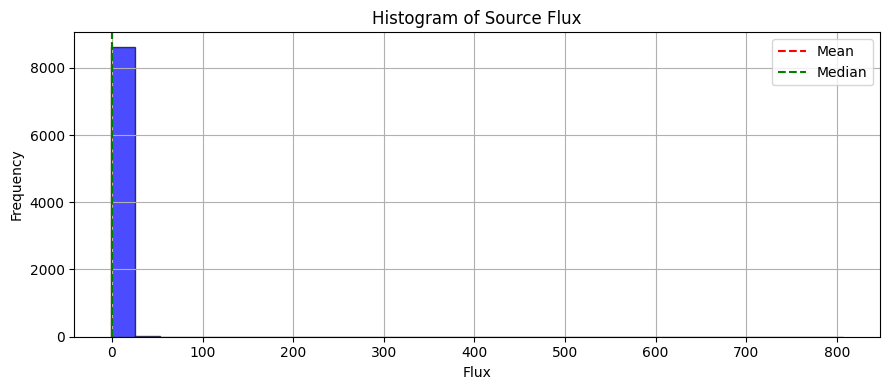

In [111]:
#Show histogram of fluxes
plt.figure(figsize=(9, 4))
plt.hist(flux, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(fluxmean, color='red', linestyle='--', label='Mean')
plt.axvline(fluxmedian, color='green', linestyle='--', label='Median')
plt.title('Histogram of Source Flux')
plt.xlabel('Flux')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('flux_histogram.pdf')
plt.show()

In [112]:
print(f"Mean flux are {fluxmean:.3f}")
print(f"Median flux are {fluxmedian:.3f}")
print(f"Standard deviation of flux are {fluxstd:.3f}")

Mean flux are 0.362
Median flux are 0.031
Standard deviation of flux are 9.244


In [ ]:
#Find the largest outlier
largest = np.max(flux)
largeindex = np.argmax(flux)
largesstd = (largest - fluxmean) / fluxstd

In [114]:
print(f"The largest outlier flux is {largest:.3f}.")
print(f"The location of largest outlier is x={sources[largeindex]['x']}, y={sources[largeindex]['y']}.")
print(f"The number of standard deviations from the mean is {largesstd:.3f}.")

The largest outlier flux is 807.297.
The location of largest outlier is x=2508.2123983591314, y=1244.5912308561058.
The number of standard deviations from the mean is 87.292.
